### Contents
### 1.0 Import libraries
### 2.0 Import Data
### 3.0 Task Questions (part 1)
   #### 3.1 Bar Charts
   #### 3.2 Histograms and Scatterplots
   #### 3.3 Line Charts
### 4.0 Task Questions(part 2)
   #### 4.1 Histogram
   #### 4.2 Bar chart
   #### 4.3 Line Chart (from an accuate sample)
   #### 4.4 Scatter Plot
### 5.0 Exporting visualizations
   

## 1.0 Import libraries


In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## 2.0 Import data

In [2]:
#create path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 4\instacart_basket_analysis"

In [3]:
# import orders_products_customers
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [12]:
# have a look
print('ords_prods_cust:', ords_prods_cust.shape)
ords_prods_cust.head(10)

ords_prods_cust: (32404859, 31)


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# drop that _merge column
ords_prods_cust.drop(columns = '_merge')

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


In [6]:
#import most recent orders products df
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregation.pkl'))

In [7]:
# have a look
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## 3.0 Task Questions

### 3.1  Create a bar chart

<Axes: xlabel='order_day_of_week'>

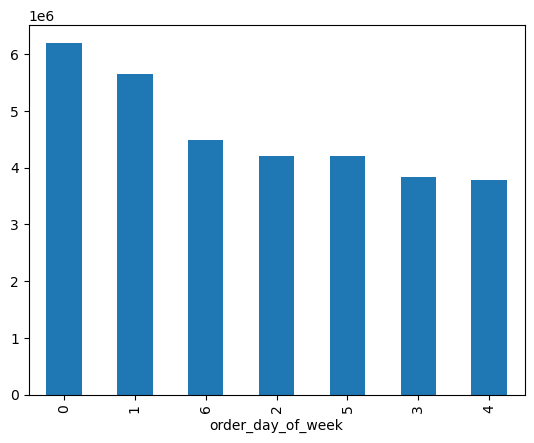

In [8]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

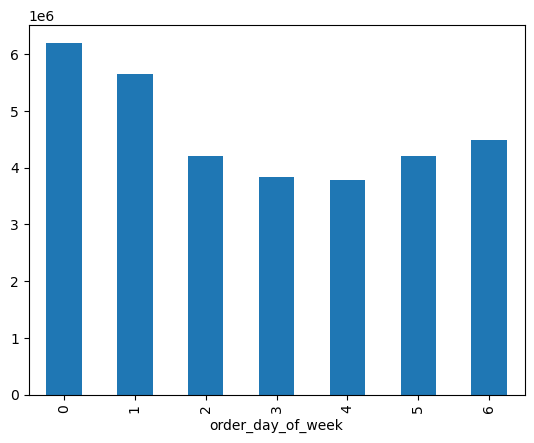

In [9]:
# sort it in order of the days of the week
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

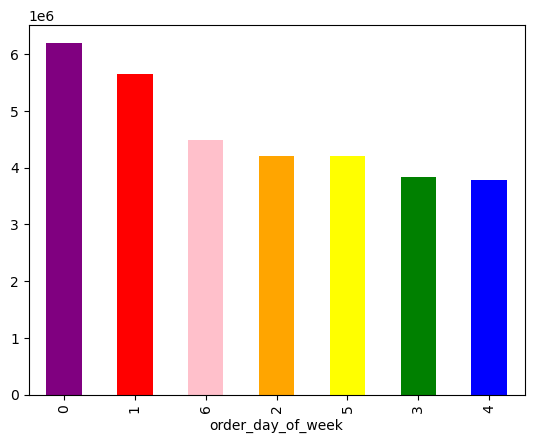

In [13]:
# add a splash of colour
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

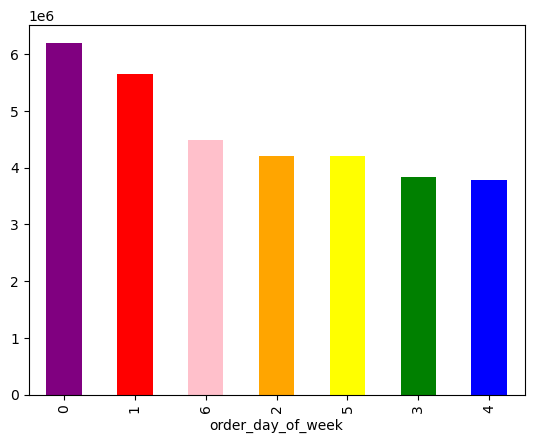

In [11]:
# check it worked
bar.figure

# exporting a bar

In [12]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## 3.2 Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

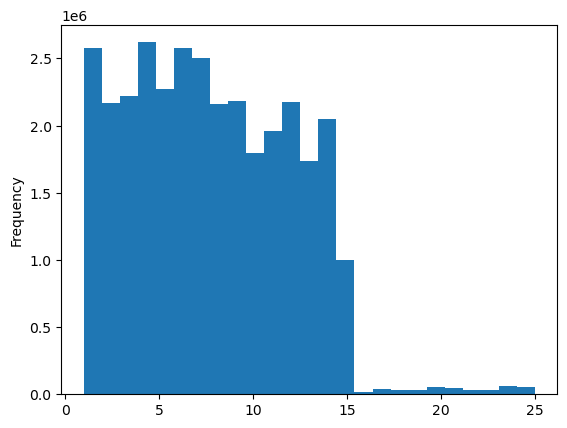

In [13]:
# create a histogram of 'prices'
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
#check out 'prices'
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [15]:
# mean alone
ords_prods_merge['prices'].mean()

7.790994092173371

In [16]:
# median alone
ords_prods_merge['prices'].median()

7.4

In [17]:
# max alone
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

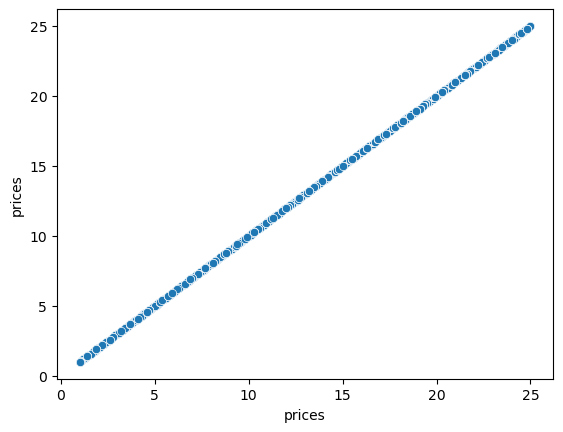

In [18]:
#create a scatterplot of prices x prices
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

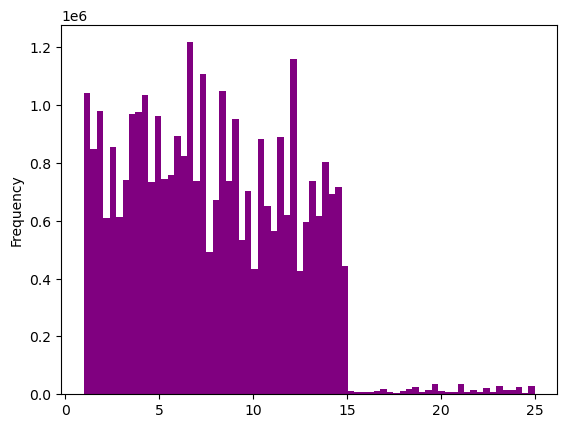

In [19]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70, color = 'purple')

In [20]:
# save my histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### 3.3 Creating Line Charts

### Sampling data


In [21]:
# set the seed. It can be anything, but it makes the results reproducible
np.random.seed(4)

In [22]:
# creating a list of boolean values for each row of ords_prods_merge ie: do they belong to the 0.7 or the 0.3
dev = np.random.rand(len(ords_prods_merge)) <=0.7

In [23]:
#take a look
dev


array([False,  True, False, ...,  True,  True,  True])

In [24]:
len(ords_prods_merge)

32404859

In [25]:
# playing with np.random.rand
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [26]:
# checking it out
dev_1 = np.random.rand(10) <= 0.7

In [27]:
dev_1

array([ True, False,  True, False,  True, False, False,  True,  True,
       False])

In [28]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [29]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [30]:
# Take a look at big

big.shape


(22683761, 23)

In [31]:
# Take a look at small
small.shape

(9721098, 23)

In [32]:
# compare to ords_prods_merge
ords_prods_merge.shape

(32404859, 23)

In [33]:
9717534 / 32404859

0.29987891630696495

In [34]:
len(ords_prods_merge)

32404859

In [35]:
len(big) + len(small)

32404859

In [36]:
# creating a subset of small with only 'order_day_of_week' and 'prices'
df_2 = small[['order_day_of_week', 'prices']]

## finaly creating a line chart


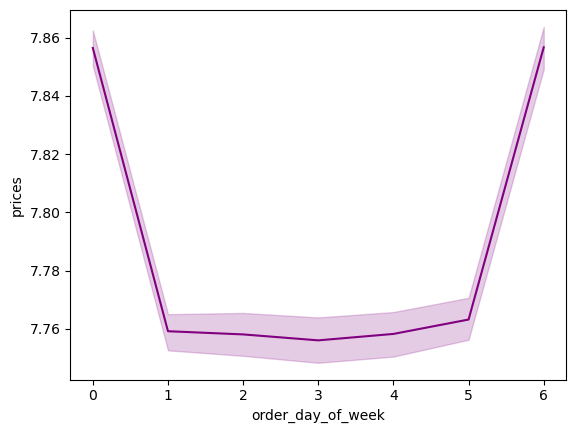

In [37]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices', color = 'purple')

# 4.0 Task Part 2

## Question 3 create a histogram

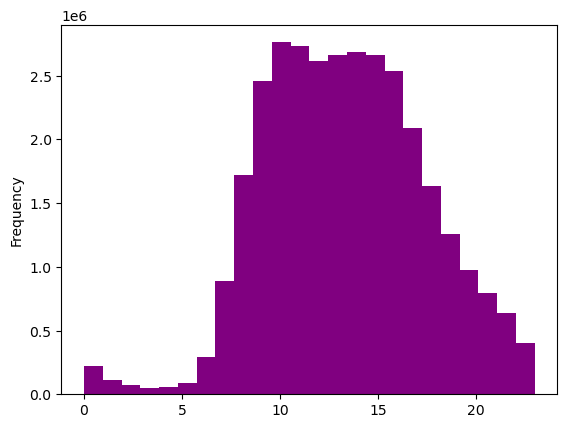

In [38]:
# create a histogram of 'order_hour_of_day'
hour_of_day_hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24, color = 'purple')

The bulk of orders are placed between the hours 9 - 17. Very few orders are placed overnight between Midnight and 7. 

## Question 4 Create a bar chart

#### trying out a fixed size to make a better png file

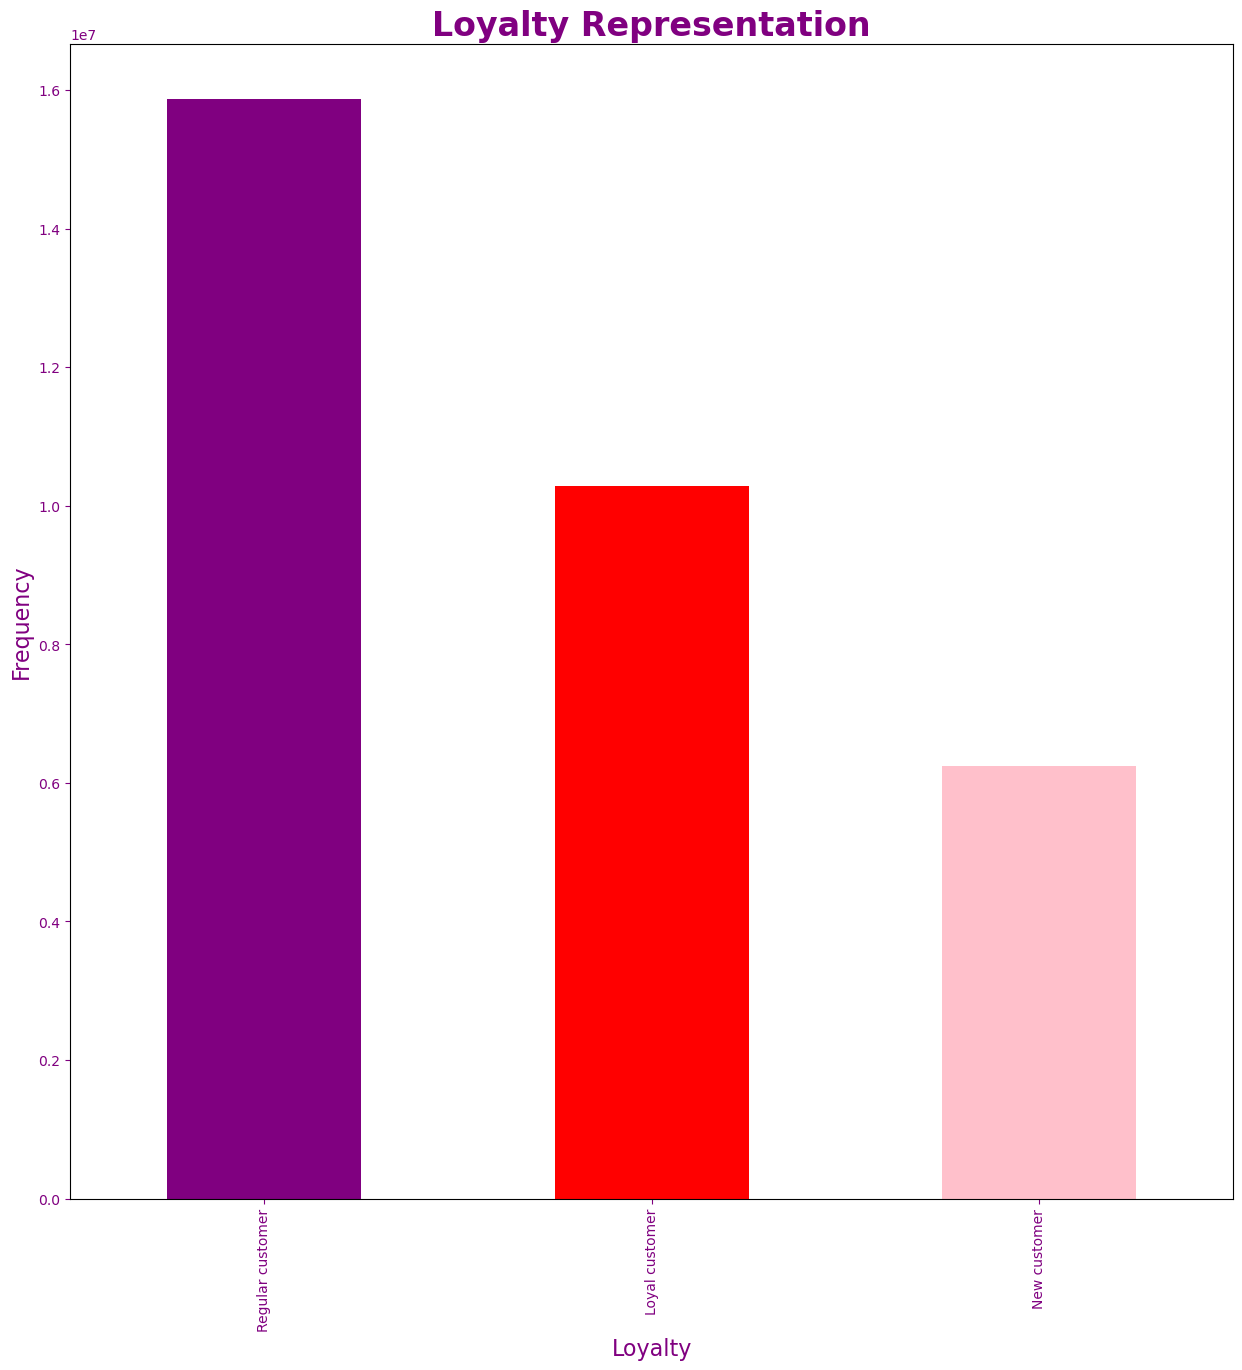

In [42]:
loyalty_bar_fig, ax = plt.subplots(figsize =(15,15))
# create a bar chart of the counts of values in the 'loyalty_flag' column
loyalty_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = ['purple', 'red', 'pink'])
# Add Lables and title
plt.xlabel('Loyalty', fontsize = 16, color = 'purple')
plt.ylabel('Frequency', fontsize = 16, color = 'purple')
plt.title('Loyalty Representation', fontsize = 24, fontweight = 'bold', color = 'purple')
# Change axis colours
plt.tick_params(axis = 'both', labelcolor = 'purple', color = 'purple')

In [43]:
#export my new loyalty_bar_fig
loyalty_bar_fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar_better.png'))

#### Back to how it was in the task


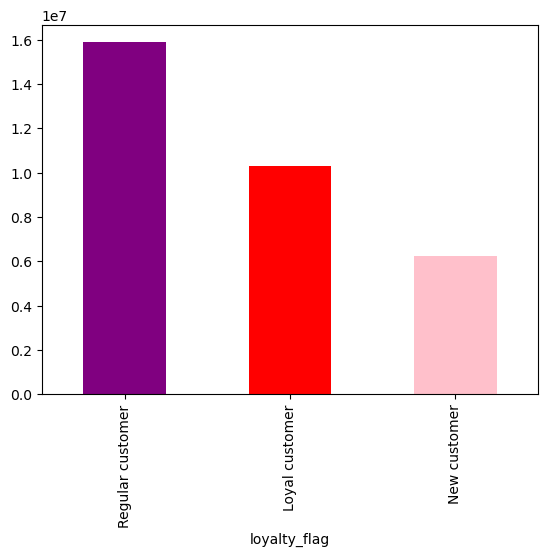

In [39]:
# create a bar chart of the counts of values in the 'loyalty_flag' column
loyalty_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = ['purple', 'red', 'pink'])

## Question 5 Create a line chart (from an accurate sample)

In [41]:
# check which columns are in small
small.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag'],
      dtype='object')

In [43]:
# create a subset with only the columns 'order_hour_of_day' and 'prices'
df_3 = small[['order_hour_of_day', 'prices']]

In [44]:
# check it out
print('df_3 shape:', df_3.shape)
df_3.head()

df_3 shape: (9721098, 2)


,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,9,9.0


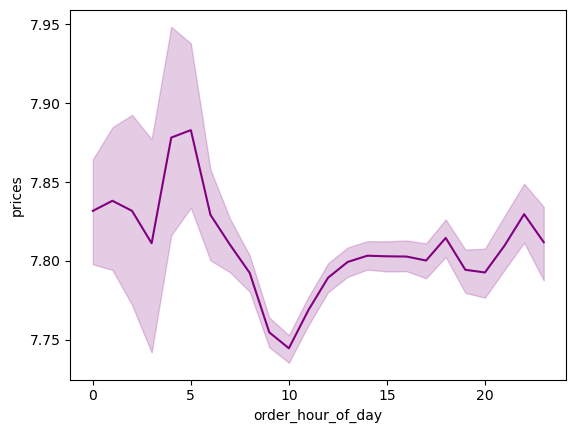

In [45]:
hour_price_line = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices', color = 'purple')

Interestingly, it seems like the higest price orders are at the times with the lowest number of orders. 

## Question 6 create a line chart

In [46]:
# create a 70/30 sample of ords_prods_cust starting with a set of Booleans
dev_1 = np.random.rand(len(ords_prods_cust)) <=0.7

In [47]:
#check it out
dev_1

array([ True,  True,  True, ..., False, False,  True])

In [48]:
# store 70% of the sample in dataframe big_cust
big_cust = ords_prods_cust[dev_1]

In [49]:
# store 30% in the dataframe small_cust
small_cust = ords_prods_cust[~dev_1]

In [50]:
# check the shapes
print('ords_prods_cust shape:', ords_prods_cust.shape)
print('big_cust shape:', big_cust.shape)
print('small_cust shape:', small_cust.shape)

ords_prods_cust shape: (32404859, 31)
big_cust shape: (22687326, 31)
small_cust shape: (9717533, 31)


In [52]:
# compare the size
9717533 / 32404859

0.2998788854473954

In [53]:
#check the columns in small_cust
small_cust.columns


Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [54]:
#create a subset with only age and n_dependants
df_4 = small_cust[['age', 'n_dependants']]

In [55]:
print('df_4 shape:', df_4.shape)
df_4.head(10)

df_4 shape: (9717533, 2)


,age,n_dependants
3,31,3
7,31,3
12,31,3
15,31,3
26,31,3
38,31,3
40,31,3
46,31,3
56,31,3
61,69,0


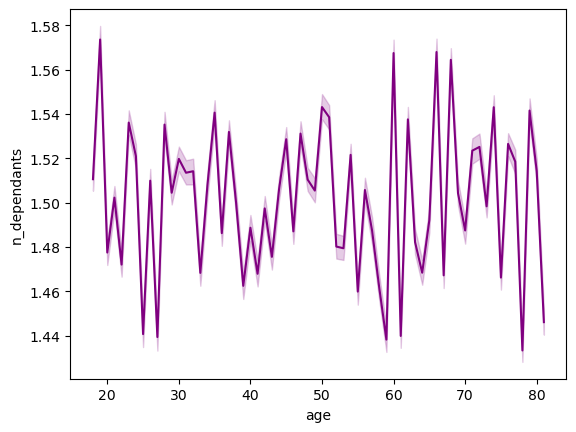

In [56]:
#create a line chart of the relationship between age and n_depentants
age_dependants_line = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants', color = 'purple')

It seems there is no correlation between age and number of dependants. I'll flip it, and try it with an aggregate value for fun. 

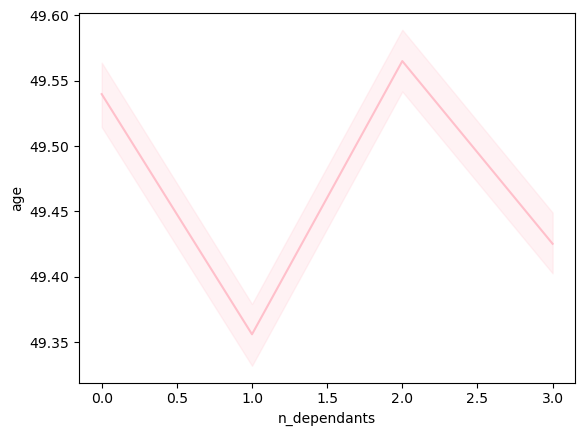

In [57]:
#create a line chart of the relationship between n_dependants and age
dependants_age_line = sns.lineplot(data = df_4, x = 'n_dependants', y = 'age', color = 'pink')

In [58]:
# create a column for average n_dependants grouped by age
ords_prods_cust['mean_n_dependants_by_age'] = ords_prods_cust.groupby(['age'])['n_dependants'].transform(np.mean)

In [59]:
#create a subset with only 'age' and 'mean_n_dependants_by_age'
df_5 = ords_prods_cust[['age', 'mean_n_dependants_by_age']]

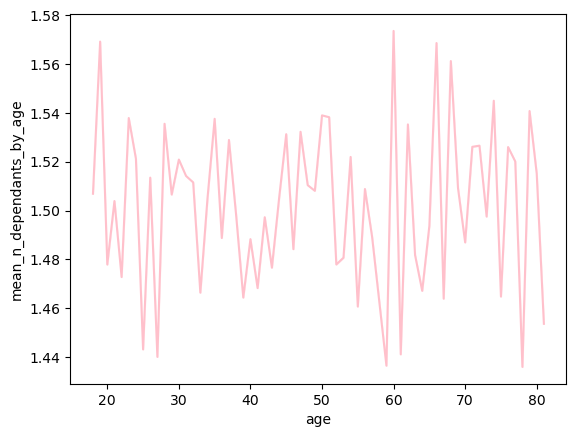

In [60]:
# check out if it looks any different on a plot when we aggregate the mean of n_depentants grouped by age
age_mean_dependants_line = sns.lineplot(data = df_5, x = 'age', y = 'mean_n_dependants_by_age', color = 'pink')

## Question 7 Create a Scatterplot

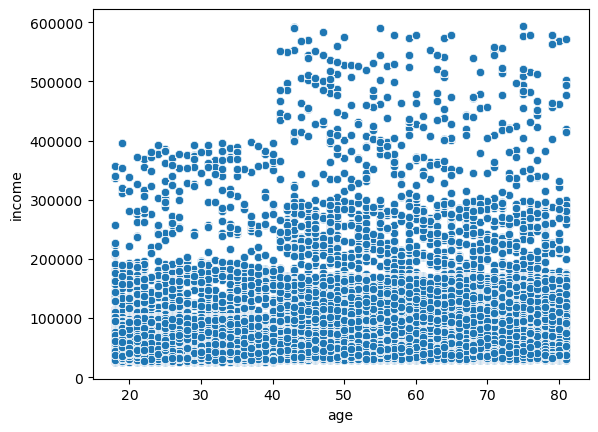

In [67]:
# create a scatterplot of the relationship between age and income
age_income_scatter = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust)

There just arent any under 40s with incomes over 400000, And it is much less common that they earn between 200000 and 400000. Over 40s are much more likely to earn up to 300000 than their younger counterparts with a fairly even, but small spread of customers aged 40-80+ earning between 30000 and 60000.


## 5.0 Exporting Visualizations


In [62]:
# save my order_day prices line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_prices_line.png'))

In [63]:
# save my hour_of_day histogram
hour_of_day_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day.png'))

In [64]:
# save my loyalty_bar
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [65]:
# save my hour price line
hour_price_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_price_line.png'))

In [66]:
# save my age_dependants_line
age_dependants_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_line.png'))

In [68]:
# save my dependants_age_line
dependants_age_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_age_line.png'))

In [69]:
# save my age_mean_dependants_line
age_mean_dependants_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_mean_dependants_line.png'))

In [70]:
# save my age_income_scatter
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))